<a href="https://colab.research.google.com/github/paulinakaszuba94/KYC/blob/main/KYCAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook created by Paulina Kaszuba**

**Import of the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('bmh')

from datetime import datetime
import dateutil.parser
from ast import literal_eval

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

**Import of the data**

In [2]:
cd "/content/drive/My Drive/Colab Notebooks/RevolutAnalysis"

/content/drive/My Drive/Colab Notebooks/RevolutAnalysis


In [3]:
ls

 doc_reports.csv                'OPS Hometask FAQ.pdf'
 facial_similarity_reports.csv  'Revolut Operations Challenge - 2019 - v2.pdf'
 __MACOSX/                       veritas.html


In [4]:
#Load dataset with reports of all Document Checks
df1 = pd.read_csv("doc_reports.csv", sep=",")

#Load dataset with reports of all Facial Similarity Checks
df2 = pd.read_csv("facial_similarity_reports.csv", sep=",")

**Look at the df1**

In [5]:
#Show the first 5 rows
df1.head()

,Unnamed: 0,user_id,result,visual_authenticity_result,image_integrity_result,face_detection_result,image_quality_result,created_at,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id,police_record_result,compromised_document_result,properties,sub_result
0,0,ab23fae164e34af0a1ad1423ce9fd9f0,consider,consider,clear,clear,clear,2017-06-20T23:12:57Z,clear,NaN,NaN,clear,clear,NaN,050a0596de424fab83c433eaa18b3f8d,clear,NaN,"{'gender': 'Male', 'nationality': 'IRL', 'docu...",caution
1,1,15a84e8951254011b47412fa4e8f65b8,clear,clear,clear,clear,clear,2017-06-20T23:16:04Z,clear,NaN,NaN,clear,NaN,NaN,f69c1e5f45a64e50a26740b9bfb978b7,clear,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear
2,2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,clear,clear,clear,2017-06-20T17:59:49Z,clear,NaN,NaN,clear,clear,NaN,f9f84f3055714d8e8f7419dc984d1769,clear,NaN,"{'gender': 'Male', 'nationality': 'ITA', 'docu...",clear
3,3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,clear,clear,clear,2017-06-20T17:59:38Z,clear,NaN,NaN,clear,clear,NaN,10a54a1ecf794404be959e030f11fef6,clear,NaN,"{'gender': 'Male', 'issuing_date': '2007-08', ...",clear
4,4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,clear,clear,clear,2017-06-20T18:08:09Z,clear,NaN,NaN,clear,clear,NaN,1f320d1d07de493292b7e0d5ebfb1cb9,clear,NaN,"{'gender': 'Male', 'nationality': 'POL', 'docu...",clear


In [6]:
print("df1 contains (rows, columns):", df1.shape)
print("Column names:", df1.columns)

df1 contains (rows, columns): (176404, 19)
Column names: Index(['Unnamed: 0', 'user_id', 'result', 'visual_authenticity_result',
       'image_integrity_result', 'face_detection_result',
       'image_quality_result', 'created_at', 'supported_document_result',
       'conclusive_document_quality_result', 'colour_picture_result',
       'data_validation_result', 'data_consistency_result',
       'data_comparison_result', 'attempt_id', 'police_record_result',
       'compromised_document_result', 'properties', 'sub_result'],
      dtype='object')


In [7]:
#General information about dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176404 entries, 0 to 176403
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Unnamed: 0                          176404 non-null  int64 
 1   user_id                             176404 non-null  object
 2   result                              176404 non-null  object
 3   visual_authenticity_result          150290 non-null  object
 4   image_integrity_result              176403 non-null  object
 5   face_detection_result               150261 non-null  object
 6   image_quality_result                176403 non-null  object
 7   created_at                          176404 non-null  object
 8   supported_document_result           175900 non-null  object
 9   conclusive_document_quality_result  95217 non-null   object
 10  colour_picture_result               95222 non-null   object
 11  data_validation_result              142

In [8]:
#Change format of the created_at column to 'datetime64'
df1['created_at'] = df1['created_at'].apply(dateutil.parser.parse)

In [9]:
#Check missing values
df1.isnull().sum()
#The most important columns: result and sub_result have no missing-values

Unnamed: 0                                 0
user_id                                    0
result                                     0
visual_authenticity_result             26114
image_integrity_result                     1
face_detection_result                  26143
image_quality_result                       1
created_at                                 0
supported_document_result                504
conclusive_document_quality_result     81187
colour_picture_result                  81182
data_validation_result                 33430
data_consistency_result                84175
data_comparison_result                173856
attempt_id                                 0
police_record_result                   31847
compromised_document_result           130898
properties                                 0
sub_result                                 0
dtype: int64

In [10]:
#Check if there are duplicated rows
duplicates = df1[df1.duplicated()]
print("df1 has:", duplicates.shape[0], "duplicates.")

df1 has: 0 duplicates.


In [11]:
#Check how many unique users are there (users with at least 1 attempt)
unique_users = df1['user_id'].nunique()
unique_users

142724

In [12]:
#If the numbers of rows is 176404 and the number of unique users is 142724, then:
another_attempts_df1 = df1.shape[0] - df1['user_id'].nunique()
another_attempts_df1

33680

In [13]:
#Percentage value of the another attempts
another_attempts_df1/df1.shape[0]*100

19.092537584181766

**Look at the df2**

In [14]:
#Show the first 5 rows
df2.head()

,Unnamed: 0,user_id,result,face_comparison_result,created_at,facial_image_integrity_result,visual_authenticity_result,properties,attempt_id
0,0,ab23fae164e34af0a1ad1423ce9fd9f0,clear,clear,2017-06-20T23:12:58Z,clear,consider,{},050a0596de424fab83c433eaa18b3f8d
1,1,15a84e8951254011b47412fa4e8f65b8,clear,clear,2017-06-20T23:16:04Z,clear,clear,{},f69c1e5f45a64e50a26740b9bfb978b7
2,2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,2017-06-20T17:59:49Z,clear,clear,{},f9f84f3055714d8e8f7419dc984d1769
3,3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,2017-06-20T17:59:39Z,clear,clear,{},10a54a1ecf794404be959e030f11fef6
4,4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,2017-06-20T18:08:09Z,clear,clear,{},1f320d1d07de493292b7e0d5ebfb1cb9


In [15]:
print("df2 contains (rows, columns):", df2.shape)
print("Column names:", df2.columns)

df2 contains (rows, columns): (176404, 9)
Column names: Index(['Unnamed: 0', 'user_id', 'result', 'face_comparison_result',
       'created_at', 'facial_image_integrity_result',
       'visual_authenticity_result', 'properties', 'attempt_id'],
      dtype='object')


In [16]:
#General information about dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176404 entries, 0 to 176403
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Unnamed: 0                     176404 non-null  int64 
 1   user_id                        176404 non-null  object
 2   result                         176403 non-null  object
 3   face_comparison_result         166007 non-null  object
 4   created_at                     176404 non-null  object
 5   facial_image_integrity_result  175941 non-null  object
 6   visual_authenticity_result     150290 non-null  object
 7   properties                     176404 non-null  object
 8   attempt_id                     176404 non-null  object
dtypes: int64(1), object(8)
memory usage: 12.1+ MB


In [17]:
#Change format of the created_at column to 'datetime64'
df2['created_at'] = df2['created_at'].apply(dateutil.parser.parse)

In [18]:
#Check missing values
df2.isnull().sum()
#The most important column: result has one missing-value

Unnamed: 0                           0
user_id                              0
result                               1
face_comparison_result           10397
created_at                           0
facial_image_integrity_result      463
visual_authenticity_result       26114
properties                           0
attempt_id                           0
dtype: int64

In [19]:
df2[df2['result'].isnull()] 
#We can see that there are missing values for the most of indicators.
#Only visual_authenticiaty_result is described as 'clear' - it is not enough to assume that the final result is 'clear'.
#So to have all values for the result column, we can accept 'consider' instead of missing value.

,Unnamed: 0,user_id,result,face_comparison_result,created_at,facial_image_integrity_result,visual_authenticity_result,properties,attempt_id
142929,148424,c198f9f7a4844f179ceb98e11fbed371,NaN,NaN,2017-08-11 17:09:24+00:00,NaN,clear,{},ae75f9608c9243709d1d47875f1a7852


In [20]:
df2.iloc[142929,2] = 'consider'

In [21]:
#Check if there are duplicated rows
duplicates = df2[df2.duplicated()]
print("df2 has:", duplicates.shape[0], "duplicates.")

df2 has: 0 duplicates.


In [22]:
#Check how many unique users are there (users with at least 1 attempt)
unique_users = df2['user_id'].nunique()
unique_users

#The same as in the df1

142724

In [23]:
#If the numbers of rows is 176404 and the number of unique users is 142724, then:
another_attempts_df2 = df2.shape[0] - df2['user_id'].nunique()
another_attempts_df2

#The same as in the df1

33680

In [24]:
#Percentage value of the another attempts
another_attempts_df2/df2.shape[0]*100

#The same as in the df1

19.092537584181766

**Drop unnecessary columns**

In [25]:
df1.drop(['Unnamed: 0'], axis=1, inplace=True)

In [26]:
df2.drop(['Unnamed: 0'], axis=1, inplace=True)

**Create keys**

In [27]:
df1['key1'] = df1['user_id'] + df1['attempt_id']

In [28]:
df2['key2'] = df2['user_id'] + df2['attempt_id']

**Merge two dataframes**

In [29]:
#Suffixes are added, when column names in both underlying dataframes are the same
df = df1.merge(df2, how='outer', left_on='key1', right_on='key2', suffixes=('_doc', '_fac'))

In [30]:
#Columns after merging
df.columns

Index(['user_id_doc', 'result_doc', 'visual_authenticity_result_doc',
       'image_integrity_result', 'face_detection_result',
       'image_quality_result', 'created_at_doc', 'supported_document_result',
       'conclusive_document_quality_result', 'colour_picture_result',
       'data_validation_result', 'data_consistency_result',
       'data_comparison_result', 'attempt_id_doc', 'police_record_result',
       'compromised_document_result', 'properties_doc', 'sub_result', 'key1',
       'user_id_fac', 'result_fac', 'face_comparison_result', 'created_at_fac',
       'facial_image_integrity_result', 'visual_authenticity_result_fac',
       'properties_fac', 'attempt_id_fac', 'key2'],
      dtype='object')

In [31]:
#Shape of the new dataframe
df.shape

(176405, 28)

In [32]:
df.head()

,user_id_doc,result_doc,visual_authenticity_result_doc,image_integrity_result,face_detection_result,image_quality_result,created_at_doc,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id_doc,police_record_result,compromised_document_result,properties_doc,sub_result,key1,user_id_fac,result_fac,face_comparison_result,created_at_fac,facial_image_integrity_result,visual_authenticity_result_fac,properties_fac,attempt_id_fac,key2
0,ab23fae164e34af0a1ad1423ce9fd9f0,consider,consider,clear,clear,clear,2017-06-20 23:12:57+00:00,clear,NaN,NaN,clear,clear,NaN,050a0596de424fab83c433eaa18b3f8d,clear,NaN,"{'gender': 'Male', 'nationality': 'IRL', 'docu...",caution,ab23fae164e34af0a1ad1423ce9fd9f0050a0596de424f...,ab23fae164e34af0a1ad1423ce9fd9f0,clear,clear,2017-06-20 23:12:58+00:00,clear,consider,{},050a0596de424fab83c433eaa18b3f8d,ab23fae164e34af0a1ad1423ce9fd9f0050a0596de424f...
1,15a84e8951254011b47412fa4e8f65b8,clear,clear,clear,clear,clear,2017-06-20 23:16:04+00:00,clear,NaN,NaN,clear,NaN,NaN,f69c1e5f45a64e50a26740b9bfb978b7,clear,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear,15a84e8951254011b47412fa4e8f65b8f69c1e5f45a64e...,15a84e8951254011b47412fa4e8f65b8,clear,clear,2017-06-20 23:16:04+00:00,clear,clear,{},f69c1e5f45a64e50a26740b9bfb978b7,15a84e8951254011b47412fa4e8f65b8f69c1e5f45a64e...
2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,clear,clear,clear,2017-06-20 17:59:49+00:00,clear,NaN,NaN,clear,clear,NaN,f9f84f3055714d8e8f7419dc984d1769,clear,NaN,"{'gender': 'Male', 'nationality': 'ITA', 'docu...",clear,ffb82fda52b041e4b9af9cb4ef298c85f9f84f3055714d...,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,2017-06-20 17:59:49+00:00,clear,clear,{},f9f84f3055714d8e8f7419dc984d1769,ffb82fda52b041e4b9af9cb4ef298c85f9f84f3055714d...
3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,clear,clear,clear,2017-06-20 17:59:38+00:00,clear,NaN,NaN,clear,clear,NaN,10a54a1ecf794404be959e030f11fef6,clear,NaN,"{'gender': 'Male', 'issuing_date': '2007-08', ...",clear,bd4a8b3e3601427e88aa1d9eab9f429010a54a1ecf7944...,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,2017-06-20 17:59:39+00:00,clear,clear,{},10a54a1ecf794404be959e030f11fef6,bd4a8b3e3601427e88aa1d9eab9f429010a54a1ecf7944...
4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,clear,clear,clear,2017-06-20 18:08:09+00:00,clear,NaN,NaN,clear,clear,NaN,1f320d1d07de493292b7e0d5ebfb1cb9,clear,NaN,"{'gender': 'Male', 'nationality': 'POL', 'docu...",clear,f52ad1c7e69543a9940c3e7f8ed28a391f320d1d07de49...,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,2017-06-20 18:08:09+00:00,clear,clear,{},1f320d1d07de493292b7e0d5ebfb1cb9,f52ad1c7e69543a9940c3e7f8ed28a391f320d1d07de49...


**Quality check**

In [33]:
df.isnull().sum()
#We have now 1 missing value for result_doc and 1 missing value for result_fac.

user_id_doc                                1
result_doc                                 1
visual_authenticity_result_doc         26115
image_integrity_result                     2
face_detection_result                  26144
image_quality_result                       2
created_at_doc                             1
supported_document_result                505
conclusive_document_quality_result     81188
colour_picture_result                  81183
data_validation_result                 33431
data_consistency_result                84176
data_comparison_result                173857
attempt_id_doc                             1
police_record_result                   31848
compromised_document_result           130899
properties_doc                             1
sub_result                                 1
key1                                       1
user_id_fac                                1
result_fac                                 1
face_comparison_result                 10398
created_at

In [34]:
df[df['result_doc'].isnull()] 

,user_id_doc,result_doc,visual_authenticity_result_doc,image_integrity_result,face_detection_result,image_quality_result,created_at_doc,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id_doc,police_record_result,compromised_document_result,properties_doc,sub_result,key1,user_id_fac,result_fac,face_comparison_result,created_at_fac,facial_image_integrity_result,visual_authenticity_result_fac,properties_fac,attempt_id_fac,key2
176404,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7563e310fa9d4cef9f44c12a3f693106,clear,clear,2017-07-10 16:14:46+00:00,clear,clear,{},96948966045741509980950989095520,7563e310fa9d4cef9f44c12a3f69310696948966045741...


In [35]:
df[df['result_fac'].isnull()] 
#We can see that there is an inconsistency beetwen attempt_id_fac above and attempt_id_doc below.
#We should change one of them to have an exact match. 

,user_id_doc,result_doc,visual_authenticity_result_doc,image_integrity_result,face_detection_result,image_quality_result,created_at_doc,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id_doc,police_record_result,compromised_document_result,properties_doc,sub_result,key1,user_id_fac,result_fac,face_comparison_result,created_at_fac,facial_image_integrity_result,visual_authenticity_result_fac,properties_fac,attempt_id_fac,key2
168513,7563e310fa9d4cef9f44c12a3f693106,clear,clear,clear,clear,clear,2017-07-10 16:14:45+00:00,clear,NaN,NaN,clear,clear,NaN,9.6949E+31,clear,NaN,"{'gender': 'Female', 'nationality': 'BEL', 'do...",clear,7563e310fa9d4cef9f44c12a3f6931069.6949E+31,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [36]:
#Take 9.6949E+31 value from the attempt_id_doc column and change it to 96948966045741509980950989095520
df1.iloc[168513,13] = df.iloc[176404, 26]

#Then there is a need, to correct key - take 7563e310fa9d4cef9f44c12a3f6931069.6949E+31 value from the key1 column
#and change it to 7563e310fa9d4cef9f44c12a3f69310696948966045741509980950989095520	
df1.iloc[168513,18] = df.iloc[176404, 27]

#Finally, we have a match between these two rows

In [37]:
#Merge tables once again after solving the issue with attempt_id
df_clean = df1.merge(df2, how='outer', left_on='key1', right_on='key2', suffixes=('_doc', '_fac'))

In [38]:
df_clean.isnull().sum()
#Now we do not have any missing values for result_doc and result_fac

user_id_doc                                0
result_doc                                 0
visual_authenticity_result_doc         26114
image_integrity_result                     1
face_detection_result                  26143
image_quality_result                       1
created_at_doc                             0
supported_document_result                504
conclusive_document_quality_result     81187
colour_picture_result                  81182
data_validation_result                 33430
data_consistency_result                84175
data_comparison_result                173856
attempt_id_doc                             0
police_record_result                   31847
compromised_document_result           130898
properties_doc                             0
sub_result                                 0
key1                                       0
user_id_fac                                0
result_fac                                 0
face_comparison_result                 10397
created_at

**Result analysis**

In [39]:
df_clean['result_doc'].value_counts(normalize=True)

clear       0.750561
consider    0.249439
Name: result_doc, dtype: float64

In [40]:
df_clean['sub_result'].value_counts(normalize=True)
#The main reason to mark an applicant as 'consider' by Document Check is to indicate 'rejected'

clear        0.750561
rejected     0.147899
caution      0.090656
suspected    0.010884
Name: sub_result, dtype: float64

In [41]:
df_clean['result_fac'].value_counts(normalize=True)
#Facial Similarity Check was passed by more users than Document Check

clear       0.938108
consider    0.061892
Name: result_fac, dtype: float64

In [42]:
#Check the results of both candidate checks
df_clean['final_result'] = df_clean['result_doc'] + df_clean['result_fac']

In [43]:
df_clean['final_result'].value_counts(normalize=True)
#The most important insight here is fact that over 1/5 of the cases are not passed because of result from Document Check 
#(Face Similarity Check is rated as clear here).

clearclear          0.719315
considerclear       0.218793
clearconsider       0.031246
considerconsider    0.030646
Name: final_result, dtype: float64

In [44]:
#Show as percentage
for number in df_clean['final_result'].value_counts():
  print((number/df_clean.shape[0])*100)

#72% of all applicants' checks were OK

71.93147547674656
21.87932246434321
3.124645699643999
3.0645563592662297


In [45]:
#Count pass rate - defined as the number of customers who pass both the KYC process divided by the number of customers who attempt the process

#Approach_1
pass_rate1 = (df_clean[df_clean['final_result']=='clearclear'].count()['final_result'])/unique_users
pass_rate1

0.8890586026176397

**Group users**

In [46]:
#Chceck if customers really had only 2 attempts
df_grouped = df_clean.groupby("user_id_doc").size().reset_index(name='number_of_attempts')
df_grouped.head(5)

,user_id_doc,number_of_attempts
0,000017082a4548d4aa480781069cf24c,2
1,000052fe85524411a593a999c2a24462,1
2,0000ae3e6cad4aa6b22a70c141cfebea,2
3,0001c1eacfdd4f1580b024de206c61e6,1
4,000215b70cd5498fa7384d7ccdc166c8,1


In [47]:
#All unique users (it was checked earlier): 142724
#We can see now how many attempts each user had
df_grouped['number_of_attempts'].value_counts()
#Result is quite surprising, because each user should have only 2 attempts!

1    110374
2     31118
3      1145
4        78
5         7
6         2
Name: number_of_attempts, dtype: int64

In [48]:
#Check if there are duplicated rows - we can assume, that different attempt_id could be given as a result of bug
df_duplicate_check = df_clean.drop(['attempt_id_doc', 'key1', 'attempt_id_fac', 'key2' ], axis=1, inplace=False)

In [49]:
#Check if there are duplicated rows
dup = df_duplicate_check[df_duplicate_check.duplicated()]
print("df_duplicate_check has:", dup.shape[0], "duplicates.")
#Now we can see that for sure there is an inconsistency in the process.
#Even time (created_at_doc and created_at_fac columns) are the same in the affected rows!

df_duplicate_check has: 4512 duplicates.


In [50]:
#Remove duplicates
df_duplicate_check.drop_duplicates(inplace=True)

In [51]:
#Check if duplicates are removed
dup2 = df_duplicate_check[df_duplicate_check.duplicated()]
print("df_duplicate_check has:", dup2.shape[0], "duplicates.")

df_duplicate_check has: 0 duplicates.


In [52]:
#Group values once again
df_grouped2 = df_duplicate_check.groupby("user_id_doc").size().reset_index(name='number_of_attempts')
df_grouped2.head(5)

,user_id_doc,number_of_attempts
0,000017082a4548d4aa480781069cf24c,2
1,000052fe85524411a593a999c2a24462,1
2,0000ae3e6cad4aa6b22a70c141cfebea,2
3,0001c1eacfdd4f1580b024de206c61e6,1
4,000215b70cd5498fa7384d7ccdc166c8,1


In [53]:
#All unique users (it was checked earlier): 142724
#We can see now how many attempts each user had
df_grouped2['number_of_attempts'].value_counts()
#The weird figures are a little bit smaller now

1    113829
2     28631
3       256
4         7
5         1
Name: number_of_attempts, dtype: int64

In [54]:
#Show users who had 4 or 5 attempts
df_grouped2.loc[(df_grouped2['number_of_attempts'] == 5) | (df_grouped2['number_of_attempts'] == 4) ]

,user_id_doc,number_of_attempts
3106,05a2673591c1426482293da3d71f416c,4
21820,2757882fb30c4a318a9aa85c4c6d4e19,4
50869,5baa87caf46e46318135171a352bd7b2,4
85816,9a42a776d029400897d8a7f0fcbedd1b,4
95794,abe6afc009da4cb283bd5f270d8c5288,5
102954,b89fb2eff54442978e40b16f640b9cd7,4
136003,f40b71d9c4ab4ce7926f75a2fb3ac20d,4
140033,fb442487855d48f5b3469eaad5b33e2d,4


In [55]:
#Sample check
df_duplicate_check.loc[df_duplicate_check['user_id_doc'] == 'abe6afc009da4cb283bd5f270d8c5288']
#This man had 5 attempts - 4 have 'clearclear' result, 1 'considerclear'. 
#It is strange that despite the first successful attempt, more were made, and how is it possible that there were more than two of them.

,user_id_doc,result_doc,visual_authenticity_result_doc,image_integrity_result,face_detection_result,image_quality_result,created_at_doc,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,police_record_result,compromised_document_result,properties_doc,sub_result,user_id_fac,result_fac,face_comparison_result,created_at_fac,facial_image_integrity_result,visual_authenticity_result_fac,properties_fac,final_result
96806,abe6afc009da4cb283bd5f270d8c5288,clear,clear,clear,clear,clear,2017-09-22 07:08:46+00:00,clear,clear,clear,clear,clear,NaN,clear,NaN,"{'gender': 'Male', 'nationality': 'AUS', 'docu...",clear,abe6afc009da4cb283bd5f270d8c5288,clear,clear,2017-09-22 07:08:46+00:00,clear,clear,{},clearclear
98322,abe6afc009da4cb283bd5f270d8c5288,clear,clear,clear,clear,clear,2017-09-20 21:04:47+00:00,clear,clear,clear,clear,clear,NaN,clear,NaN,"{'gender': 'Male', 'nationality': 'AUS', 'docu...",clear,abe6afc009da4cb283bd5f270d8c5288,clear,clear,2017-09-20 21:04:47+00:00,clear,clear,{},clearclear
123184,abe6afc009da4cb283bd5f270d8c5288,consider,NaN,consider,NaN,unidentified,2017-08-31 12:22:33+00:00,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},rejected,abe6afc009da4cb283bd5f270d8c5288,clear,clear,2017-08-31 12:22:33+00:00,clear,NaN,{},considerclear
160418,abe6afc009da4cb283bd5f270d8c5288,clear,clear,clear,clear,clear,2017-07-20 20:32:10+00:00,clear,NaN,NaN,clear,clear,NaN,clear,NaN,"{'gender': 'Male', 'nationality': 'AUS', 'docu...",clear,abe6afc009da4cb283bd5f270d8c5288,clear,clear,2017-07-20 20:32:10+00:00,clear,clear,{},clearclear
160429,abe6afc009da4cb283bd5f270d8c5288,clear,clear,clear,clear,clear,2017-07-20 20:40:32+00:00,clear,NaN,NaN,clear,clear,NaN,clear,NaN,"{'gender': 'Male', 'nationality': 'AUS', 'docu...",clear,abe6afc009da4cb283bd5f270d8c5288,clear,clear,2017-07-20 20:40:32+00:00,clear,clear,{},clearclear


In [56]:
#Sample check
df_duplicate_check.loc[df_duplicate_check['user_id_doc'] == '05a2673591c1426482293da3d71f416c']
#This woman had 4 attempts - 3 have 'clearclear' result, 1 'clearconsider'. 
#The first attempt was not successful, so the second one was reasonable, but how is it possible that there were more than two of attempts.

,user_id_doc,result_doc,visual_authenticity_result_doc,image_integrity_result,face_detection_result,image_quality_result,created_at_doc,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,police_record_result,compromised_document_result,properties_doc,sub_result,user_id_fac,result_fac,face_comparison_result,created_at_fac,facial_image_integrity_result,visual_authenticity_result_fac,properties_fac,final_result
32023,05a2673591c1426482293da3d71f416c,clear,clear,clear,clear,clear,2017-07-05 07:29:34+00:00,clear,NaN,NaN,clear,NaN,NaN,clear,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear,05a2673591c1426482293da3d71f416c,consider,NaN,2017-07-05 07:29:34+00:00,consider,clear,{},clearconsider
32105,05a2673591c1426482293da3d71f416c,clear,clear,clear,clear,clear,2017-07-05 08:58:44+00:00,clear,NaN,NaN,clear,NaN,NaN,clear,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear,05a2673591c1426482293da3d71f416c,clear,clear,2017-07-05 08:58:44+00:00,clear,clear,{},clearclear
49843,05a2673591c1426482293da3d71f416c,clear,clear,clear,clear,clear,2017-07-19 09:46:40+00:00,clear,NaN,NaN,clear,NaN,NaN,clear,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear,05a2673591c1426482293da3d71f416c,clear,clear,2017-07-19 09:46:40+00:00,clear,clear,{},clearclear
49866,05a2673591c1426482293da3d71f416c,clear,clear,clear,clear,clear,2017-07-19 09:41:00+00:00,clear,NaN,NaN,clear,NaN,NaN,clear,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear,05a2673591c1426482293da3d71f416c,clear,clear,2017-07-19 09:41:01+00:00,clear,clear,{},clearclear


In [57]:
#Sort data by user_id and date-time
df_duplicate_check = df_duplicate_check.sort_values(by=['user_id_doc', 'created_at_doc', 'created_at_fac'])

In [58]:
#Check if data is sorted
df_duplicate_check.head()

,user_id_doc,result_doc,visual_authenticity_result_doc,image_integrity_result,face_detection_result,image_quality_result,created_at_doc,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,police_record_result,compromised_document_result,properties_doc,sub_result,user_id_fac,result_fac,face_comparison_result,created_at_fac,facial_image_integrity_result,visual_authenticity_result_fac,properties_fac,final_result
47268,000017082a4548d4aa480781069cf24c,clear,clear,clear,clear,clear,2017-08-17 21:03:54+00:00,clear,clear,clear,clear,clear,NaN,clear,NaN,"{'gender': 'Male', 'nationality': 'NZL', 'docu...",clear,000017082a4548d4aa480781069cf24c,clear,clear,2017-08-17 21:03:54+00:00,clear,clear,{},clearclear
47278,000017082a4548d4aa480781069cf24c,consider,NaN,consider,NaN,unidentified,2017-08-17 21:10:25+00:00,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},rejected,000017082a4548d4aa480781069cf24c,clear,clear,2017-08-17 21:10:25+00:00,clear,NaN,{},considerclear
54399,000052fe85524411a593a999c2a24462,clear,clear,clear,clear,clear,2017-07-26 10:14:12+00:00,clear,NaN,NaN,clear,clear,NaN,clear,NaN,"{'gender': 'Female', 'nationality': 'NLD', 'do...",clear,000052fe85524411a593a999c2a24462,clear,clear,2017-07-26 10:14:12+00:00,clear,clear,{},clearclear
77103,0000ae3e6cad4aa6b22a70c141cfebea,consider,clear,clear,clear,clear,2017-10-04 12:50:16+00:00,clear,clear,clear,consider,NaN,NaN,clear,NaN,"{'issuing_date': '2015-05-18', 'document_type'...",caution,0000ae3e6cad4aa6b22a70c141cfebea,clear,clear,2017-10-04 12:50:16+00:00,clear,clear,{},considerclear
75750,0000ae3e6cad4aa6b22a70c141cfebea,consider,clear,consider,clear,clear,2017-10-04 21:43:53+00:00,clear,consider,clear,clear,clear,NaN,clear,clear,"{'gender': 'Female', 'nationality': 'IRL', 'do...",caution,0000ae3e6cad4aa6b22a70c141cfebea,clear,clear,2017-10-04 21:43:53+00:00,clear,clear,{},considerclear


In [59]:
#Save only the first 2 attempts
df_2_attempts = df_duplicate_check.groupby(['user_id_doc']).apply(lambda x: x.nsmallest(n=2, columns='created_at_doc')).reset_index(drop=True)

In [61]:
#Check if the formula above is working correct
df_2_attempts.loc[df_2_attempts['user_id_doc'] == '05a2673591c1426482293da3d71f416c']

,user_id_doc,result_doc,visual_authenticity_result_doc,image_integrity_result,face_detection_result,image_quality_result,created_at_doc,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,police_record_result,compromised_document_result,properties_doc,sub_result,user_id_fac,result_fac,face_comparison_result,created_at_fac,facial_image_integrity_result,visual_authenticity_result_fac,properties_fac,final_result
3710,05a2673591c1426482293da3d71f416c,clear,clear,clear,clear,clear,2017-07-05 07:29:34+00:00,clear,NaN,NaN,clear,NaN,NaN,clear,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear,05a2673591c1426482293da3d71f416c,consider,NaN,2017-07-05 07:29:34+00:00,consider,clear,{},clearconsider
3711,05a2673591c1426482293da3d71f416c,clear,clear,clear,clear,clear,2017-07-05 08:58:44+00:00,clear,NaN,NaN,clear,NaN,NaN,clear,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear,05a2673591c1426482293da3d71f416c,clear,clear,2017-07-05 08:58:44+00:00,clear,clear,{},clearclear


In [68]:
df_clear = df_2_attempts[['user_id_doc', 'final_result']].copy()

In [69]:
#Create keys to consider the allowed 2 attempts for each applicant
df_clear['key3'] = df_clear['user_id_doc'] + df_clear['final_result']

In [71]:
#Drop unnecessary columns
df_clear = df_clear.drop(['user_id_doc', 'final_result'], axis=1)

In [72]:
#Show indexes of only these entries where we have 'clearclear' result
clearclear_index = np.where(df_clear['key3'].str.endswith('clearclear'))

In [73]:
#Apply indexes to the DataFrame
df_clear = df_clear.loc[clearclear_index]

In [74]:
#Count the unique 'clearclear' results
unique_clearclear = df_clear.nunique()
unique_clearclear
#Now we have the number of unique 'clearclear' results from all candidates - without duplicates and only from 2 first attempts

key3    121416
dtype: int64

In [75]:
#Count pass rate - defined as the number of customers who pass both the KYC process divided by the number of customers who attempt the process
#Here, our approach is to count a test-passing event by a given user only once. Additionally, we consider only the first two attempts.

#Approach_2
pass_rate2 = unique_clearclear/unique_users
pass_rate2

key3    0.850705
dtype: float64

**Properties**

In [76]:
#Look at properties extracted from documents by OCR
df_clean['properties_doc'] =  df_clean['properties_doc'].map(lambda x : literal_eval(x))
df_clean['properties_fac'] =  df_clean['properties_fac'].map(lambda x : literal_eval(x))

In [77]:
prop_doc = pd.DataFrame(df_clean['properties_doc'].values.tolist(), index=df_clean.index)
prop_fac = pd.DataFrame(df_clean['properties_fac'].values.tolist(), index=df_clean.index)

In [78]:
prop_doc.head()

,gender,nationality,document_type,date_of_expiry,issuing_country,issuing_date,issuing_state,document_version
0,Male,IRL,passport,2019-08-12,IRL,NaN,NaN,NaN
1,Female,NaN,driving_licence,2023-02-28,GBR,NaN,NaN,NaN
2,Male,ITA,passport,2018-06-09,ITA,NaN,NaN,NaN
3,Male,NaN,national_identity_card,NaN,FRA,2007-08,NaN,NaN
4,Male,POL,national_identity_card,2019-05-29,POL,NaN,NaN,NaN


In [82]:
prop_doc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176404 entries, 0 to 176403
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   gender            119938 non-null  object
 1   nationality       78472 non-null   object
 2   document_type     150298 non-null  object
 3   date_of_expiry    129115 non-null  object
 4   issuing_country   150301 non-null  object
 5   issuing_date      51793 non-null   object
 6   issuing_state     794 non-null     object
 7   document_version  62 non-null      object
dtypes: object(8)
memory usage: 12.1+ MB


In [79]:
prop_fac.head()

,score
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [83]:
prop_fac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176404 entries, 0 to 176403
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   3483 non-null   float64
dtypes: float64(1)
memory usage: 2.7 MB


In [84]:
df_final = pd.concat([df_clean, prop_doc], axis=1)
df_final = pd.concat([df_final, prop_fac], axis=1)
df_final = df_final.drop(['properties_doc', 'properties_fac', 'key1', 'key2', 'user_id_fac', 'attempt_id_fac'], axis=1, inplace=False)
df_final = df_final.rename(columns={'user_id_doc': 'user_id', 'attempt_id_doc':'attempt_id'})

In [85]:
df_final.head()

,user_id,result_doc,visual_authenticity_result_doc,image_integrity_result,face_detection_result,image_quality_result,created_at_doc,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id,police_record_result,compromised_document_result,sub_result,result_fac,face_comparison_result,created_at_fac,facial_image_integrity_result,visual_authenticity_result_fac,final_result,gender,nationality,document_type,date_of_expiry,issuing_country,issuing_date,issuing_state,document_version,score
0,ab23fae164e34af0a1ad1423ce9fd9f0,consider,consider,clear,clear,clear,2017-06-20 23:12:57+00:00,clear,NaN,NaN,clear,clear,NaN,050a0596de424fab83c433eaa18b3f8d,clear,NaN,caution,clear,clear,2017-06-20 23:12:58+00:00,clear,consider,considerclear,Male,IRL,passport,2019-08-12,IRL,NaN,NaN,NaN,NaN
1,15a84e8951254011b47412fa4e8f65b8,clear,clear,clear,clear,clear,2017-06-20 23:16:04+00:00,clear,NaN,NaN,clear,NaN,NaN,f69c1e5f45a64e50a26740b9bfb978b7,clear,NaN,clear,clear,clear,2017-06-20 23:16:04+00:00,clear,clear,clearclear,Female,NaN,driving_licence,2023-02-28,GBR,NaN,NaN,NaN,NaN
2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,clear,clear,clear,2017-06-20 17:59:49+00:00,clear,NaN,NaN,clear,clear,NaN,f9f84f3055714d8e8f7419dc984d1769,clear,NaN,clear,clear,clear,2017-06-20 17:59:49+00:00,clear,clear,clearclear,Male,ITA,passport,2018-06-09,ITA,NaN,NaN,NaN,NaN
3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,clear,clear,clear,2017-06-20 17:59:38+00:00,clear,NaN,NaN,clear,clear,NaN,10a54a1ecf794404be959e030f11fef6,clear,NaN,clear,clear,clear,2017-06-20 17:59:39+00:00,clear,clear,clearclear,Male,NaN,national_identity_card,NaN,FRA,2007-08,NaN,NaN,NaN
4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,clear,clear,clear,2017-06-20 18:08:09+00:00,clear,NaN,NaN,clear,clear,NaN,1f320d1d07de493292b7e0d5ebfb1cb9,clear,NaN,clear,clear,clear,2017-06-20 18:08:09+00:00,clear,clear,clearclear,Male,POL,national_identity_card,2019-05-29,POL,NaN,NaN,NaN,NaN


In [86]:
df_final.columns

Index(['user_id', 'result_doc', 'visual_authenticity_result_doc',
       'image_integrity_result', 'face_detection_result',
       'image_quality_result', 'created_at_doc', 'supported_document_result',
       'conclusive_document_quality_result', 'colour_picture_result',
       'data_validation_result', 'data_consistency_result',
       'data_comparison_result', 'attempt_id', 'police_record_result',
       'compromised_document_result', 'sub_result', 'result_fac',
       'face_comparison_result', 'created_at_fac',
       'facial_image_integrity_result', 'visual_authenticity_result_fac',
       'final_result', 'gender', 'nationality', 'document_type',
       'date_of_expiry', 'issuing_country', 'issuing_date', 'issuing_state',
       'document_version', 'score'],
      dtype='object')

In [87]:
#We can check what information was extracted from the document through OCR and returned in the properties attribute
df_final['gender'].value_counts()
#Here we can see that someone provided information: MALE, FEMALE - has the wrong format
#We have also numbers

Male      78397
Female    41536
8             3
FEMALE        1
MALE          1
Name: gender, dtype: int64

In [88]:
df_final['nationality'].value_counts().tail(50)
#We can see a lot of weird entries - for example numbers or signs

SLE     2
DMA     2
ROM     2
122     2
0       2
TA<     2
BDI     2
<B0     2
SOM     2
MWI     2
Svn     1
CAO     1
G8R     1
010     1
BRB     1
XXY     1
BWA     1
1GT     1
AVN     1
G5R     1
LSP     1
ESO     1
MDV     1
TJK     1
BFA     1
<<<     1
GBS     1
F5P     1
AND     1
080     1
B       1
072     1
011     1
TZA     1
042     1
PSE     1
SVN     1
O7I     1
W       1
BLZ     1
030     1
POO     1
CAF     1
BPV     1
I       1
MNE     1
CFU     1
ITU     1
090     1
DN<     1
Name: nationality, dtype: int64

In [89]:
df_final['document_type'].value_counts()
#work_permit and birth_certificate are not identity documents (other docuemnts)
#residence_permit is not acceptable document at all
#Other documents are identity documents but there are specific rules for which coutries are accepted which documents

national_identity_card    54613
driving_licence           50492
passport                  42228
residence_permit           2929
work_permit                  17
voter_id                     11
tax_id                        7
birth_certificate             1
Name: document_type, dtype: int64

In [90]:
pd.crosstab(df_final['final_result'], df_final['document_type'], margins=True)
#residence_permit is not an identity document - so we have here 25000 false clear
#work permit also - 16 false clear


document_type,birth_certificate,driving_licence,national_identity_card,passport,residence_permit,tax_id,voter_id,work_permit,All
final_result,,,,,,,,,
clearclear,0,42535,47872,33946,2500,7,11,16,126887
clearconsider,1,2330,1873,1188,120,0,0,0,5512
considerclear,0,5215,4373,6727,286,0,0,1,16602
considerconsider,0,412,495,367,23,0,0,0,1297
All,1,50492,54613,42228,2929,7,11,17,150298


In [91]:
df_final['issuing_country'].value_counts().tail(25)
#There everything seems to be fine

BRN    1
QAT    1
BRB    1
BWA    1
TCD    1
UGA    1
MRT    1
KHM    1
AGO    1
SLE    1
TZA    1
BMU    1
PAN    1
GMB    1
MDV    1
FRN    1
SDN    1
TJK    1
AFG    1
CAF    1
BFA    1
BLZ    1
MNE    1
Svn    1
MWI    1
Name: issuing_country, dtype: int64

In [93]:
#We know that there are specific rules that determine which identity document is allowed at what location.
#There is no specific information in the documentation, whether it concerns the country of residence, 
#country of birth (citizenship) or country of issue of the document.
#For the purposes of analysis, I assume that rules apply to the country of issue of the document.
#We can check the relationship between the document type and the issuing country.

pd.crosstab(df_final['document_type'], df_final['issuing_country'], margins=True)
#For example, we can see that people from Austria (AUT), Switzerland (CHH) or France (FRA) tried to provide driving licence,
#which is allowed only in USA, GBR and CAN.
#There are many problems of this kind.

issuing_country,AFG,AGO,ALB,ARE,ARG,ARM,AUS,AUT,AZE,BEL,BEN,BFA,BGD,BGR,BHR,BIH,BLR,BLZ,BMU,BOL,BRA,BRB,BRN,BWA,CAF,CAN,CHE,CHL,CHN,CIV,CMR,COD,COG,COL,COM,CPV,CRI,CUB,CYP,CZE,DEU,DMA,DNK,DOM,DZA,ECU,EGY,ESP,EST,ETH,FIN,FRA,FRN,GAB,GBR,GEO,GGY,GHA,GIB,GIN,GMB,GRC,GRD,GTM,HKG,HND,HRV,HTI,HUN,IDN,IMN,IND,IRL,IRN,IRQ,ISL,ISR,ITA,JAM,JEY,JOR,JPN,KAZ,KEN,KGZ,KHM,KNA,KOR,KWT,KYA,LBN,LBY,LCA,LIE,LKA,LTU,LUX,LVA,MAR,MCO,MDA,MDG,MDV,MEX,MKD,MLI,MLT,MNE,MRT,MUS,MWI,MYS,NAM,NGA,NIC,NLD,NOR,NPL,NZL,OMN,PAK,PAN,PER,PHL,POL,PRT,PRY,QAT,RKS,ROU,RUS,SAU,SDN,SEN,SGP,SI<,SLE,SLV,SRB,SUR,SVK,SVN,SWE,SWZ,SYC,SYR,Svn,TCD,TGO,THA,TJK,TKM,TTO,TUN,TUR,TWN,TZA,UGA,UKR,URY,USA,UZB,VEN,VNM,ZAF,ZIM,ZMB,ZWE,All
document_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
birth_certificate,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
driving_licence,0,0,0,11,4,0,273,258,0,102,0,0,1,101,0,1,7,0,1,0,47,0,0,0,0,89,866,2,0,0,0,0,0,3,0,0,0,0,54,350,702,0,262,0,1,0,0,958,44,0,159,2493,0,0,26478,1,42,0,38,0,0,1067,0,1,0,0,20,0,248,6,81,0,2774,0,0,14,31,1634,2,299,2,0,0,0,0,0,0,0,0,0,0,0,0,4,0,4142,25,204,26,0,7,0,0,9,4,0,73,0,0,0,0,23,0,1,0,1091,230,0,183,0,0,0,3,1,2554,736,0,0,0,330,65,7,1,0,41,0,0,0,6,0,112,212,409,4,0,0,0,0,0,8,0,0,0,9,35,0,0,0,26,1,355,0,0,5,20,0,0,0,50489
national_identity_card,0,0,6,8,24,0,0,171,1,1153,0,0,1,568,1,3,0,0,0,0,10,0,0,0,0,7,1627,12,0,0,0,0,0,8,0,0,0,0,586,654,2821,0,2,1,4,3,0,7044,286,0,50,13840,1,0,11,5,0,0,805,0,0,1254,0,0,50,0,264,0,835,5,0,7,338,0,0,0,0,1221,0,0,3,0,0,0,0,0,0,0,2,2,0,0,0,4,0,7302,51,567,27,4,5,0,0,4,7,0,479,1,0,0,0,25,0,0,0,442,2,0,0,3,7,0,4,2,5533,4093,1,1,0,1173,0,0,0,0,35,9,0,0,3,0,317,577,185,0,0,0,1,0,0,8,0,0,0,0,17,0,0,0,0,0,7,0,3,2,18,0,0,0,54613
passport,1,1,20,0,35,3,377,303,7,175,11,1,36,226,3,5,37,1,0,5,248,1,1,1,1,150,304,18,313,12,19,2,2,76,2,2,3,9,74,245,767,2,220,5,47,8,22,1298,49,4,102,6676,0,6,11967,9,0,9,0,2,1,1024,3,2,0,5,65,3,279,49,0,520,5991,15,4,20,40,1890,3,0,2,85,27,13,6,1,2,82,3,0,35,4,3,0,7,1471,10,465,135,2,9,6,1,84,10,5,66,0,1,14,1,133,3,28,4,817,128,7,283,0,33,1,22,193,935,660,1,0,5,490,322,9,0,27,80,0,1,4,42,2,94,145,204,0,2,4,0,1,6,57,1,2,2,46,77,326,1,1,131,2,324,5,23,55,95,2,2,3,42228
residence_permit,0,0,0,6,0,0,0,20,0,167,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,76,1,0,0,0,0,0,0,0,0,0,0,33,19,98,0,10,0,0,0,0,161,29,0,2,512,0,0,1209,0,0,0,0,0,0,1,0,0,0,0,2,0,12,0,0,0,129,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,9,16,0,1,0,0,0,0,0,0,97,0,0,0,0,0,0,0,0,90,10,0,0,0,0,0,0,0,88,25,0,0,0,6,0,0,0,0,0,0,0,0,0,0,9,4,9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2929
tax_id,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
voter_id,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11
work_permit,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [94]:
df_final['issuing_state'].value_counts().tail(50)
#If there should be state from USA - we have definitelly too many abbreviations - for example ACT, DIF, CE  

WA     35
FL     30
BC     24
MD     23
MA     21
NJ     17
SA     17
IL     16
TX     16
QC     15
AB     13
MI     12
VA     11
AZ     10
CT     10
PA      9
GA      8
NC      6
CO      6
MO      5
OH      5
WI      4
ACT     4
TN      4
DC      4
DIF     4
OR      3
SC      3
NH      3
MN      3
RJ      3
NLE     2
PR      2
NE      2
VT      2
NV      2
CE      2
UT      2
SP      2
ME      1
VER     1
MS      1
NS      1
JAL     1
MG      1
RS      1
RI      1
NT      1
MEX     1
IN      1
Name: issuing_state, dtype: int64

In [95]:
df_final['document_version'].value_counts()

10000    41
20000    21
Name: document_version, dtype: int64

**Correlations**

In [96]:
df_final.columns

Index(['user_id', 'result_doc', 'visual_authenticity_result_doc',
       'image_integrity_result', 'face_detection_result',
       'image_quality_result', 'created_at_doc', 'supported_document_result',
       'conclusive_document_quality_result', 'colour_picture_result',
       'data_validation_result', 'data_consistency_result',
       'data_comparison_result', 'attempt_id', 'police_record_result',
       'compromised_document_result', 'sub_result', 'result_fac',
       'face_comparison_result', 'created_at_fac',
       'facial_image_integrity_result', 'visual_authenticity_result_fac',
       'final_result', 'gender', 'nationality', 'document_type',
       'date_of_expiry', 'issuing_country', 'issuing_date', 'issuing_state',
       'document_version', 'score'],
      dtype='object')

In [97]:
res_doc = {'consider':0, 'clear':1}
df_final['result_doc'] = df_final['result_doc'].map(res_doc)

In [98]:
visual_auth = {'consider':0, 'clear':1}
df_final['visual_authenticity_result_doc'] = df_final['visual_authenticity_result_doc'].map(visual_auth)

In [99]:
img_integrity = {'consider':0, 'clear':1}
df_final['image_integrity_result'] = df_final['image_integrity_result'].map(img_integrity)

In [100]:
face = {'consider':0, 'clear':1}
df_final['face_detection_result'] = df_final['face_detection_result'].map(face)

In [101]:
quality = {'unidentified':0, 'clear':1}
df_final['image_quality_result'] = df_final['image_quality_result'].map(quality)

In [102]:
supported = {'unidentified':0, 'clear':1}
df_final['supported_document_result'] = df_final['supported_document_result'].map(supported)

In [103]:
conclusive = {'consider':0, 'clear':1}
df_final['conclusive_document_quality_result'] = df_final['conclusive_document_quality_result'].map(conclusive)

In [104]:
colour = {'consider':0, 'clear':1}
df_final['colour_picture_result'] = df_final['colour_picture_result'].map(colour)

In [105]:
data_val = {'consider':0, 'clear':1}
df_final['data_validation_result'] = df_final['data_validation_result'].map(data_val)

In [106]:
consistency = {'consider':0, 'clear':1}
df_final['data_consistency_result'] = df_final['data_consistency_result'].map(consistency)

In [107]:
data_comparison = {'consider':0, 'clear':1}
df_final['data_comparison_result'] = df_final['data_comparison_result'].map(data_comparison)

In [108]:
police = {'consider':0, 'clear':1}
df_final['police_record_result'] = df_final['police_record_result'].map(police)

In [109]:
compromised = {'consider':0, 'clear':1}
df_final['compromised_document_result'] = df_final['compromised_document_result'].map(compromised)

In [110]:
res_fac = {'consider':0, 'clear':1}
df_final['result_fac'] = df_final['result_fac'].map(res_fac)

In [111]:
face_comparison = {'consider':0, 'clear':1}
df_final['face_comparison_result'] = df_final['face_comparison_result'].map(face_comparison)

In [112]:
facial_img_integrity = {'consider':0, 'clear':1}
df_final['facial_image_integrity_result'] = df_final['facial_image_integrity_result'].map(facial_img_integrity)

In [113]:
visual_auth_fac = {'consider':0, 'clear':1}
df_final['visual_authenticity_result_fac'] = df_final['visual_authenticity_result_fac'].map(visual_auth_fac)

In [114]:
gen = {'Male':0, 'Female':1, 'MALE':0, 'FEMALE':1, '8':None}
df_final['gender'] = df_final['gender'].map(gen)

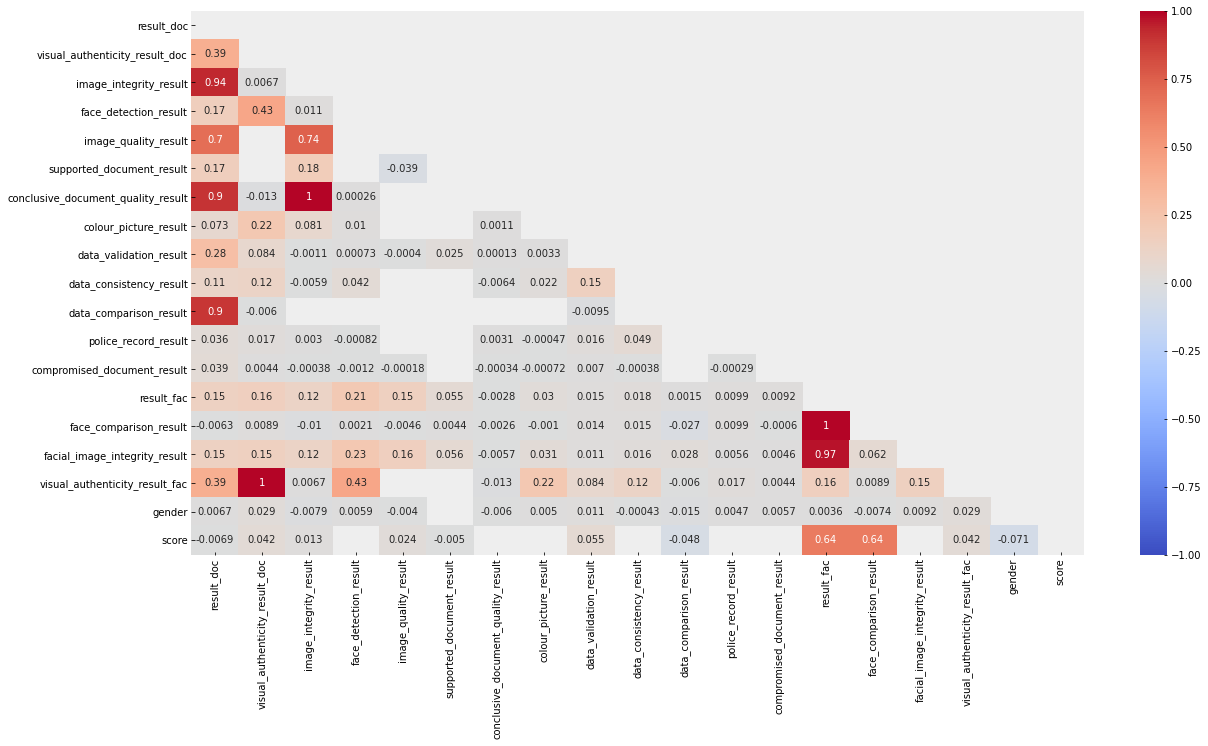

In [115]:
c = df_final.corr()

#Filter out the top half of the correlation matrix - it’s simply a duplication of the bottom half
#It also filters out the diagonal correlations of 1 where features are being compared to themselves
mask = np.zeros_like(c, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,10))

sns.heatmap(data=c, annot=True, cmap='coolwarm', vmin=-1, mask=mask)

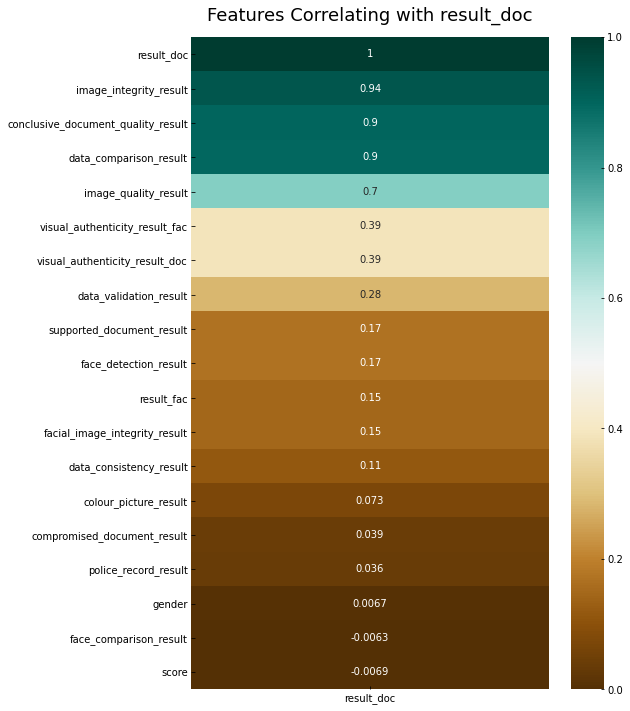

In [116]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_final.corr()[['result_doc']].sort_values(by='result_doc', ascending=False), vmin=0, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with result_doc', fontdict={'fontsize':18}, pad=16);

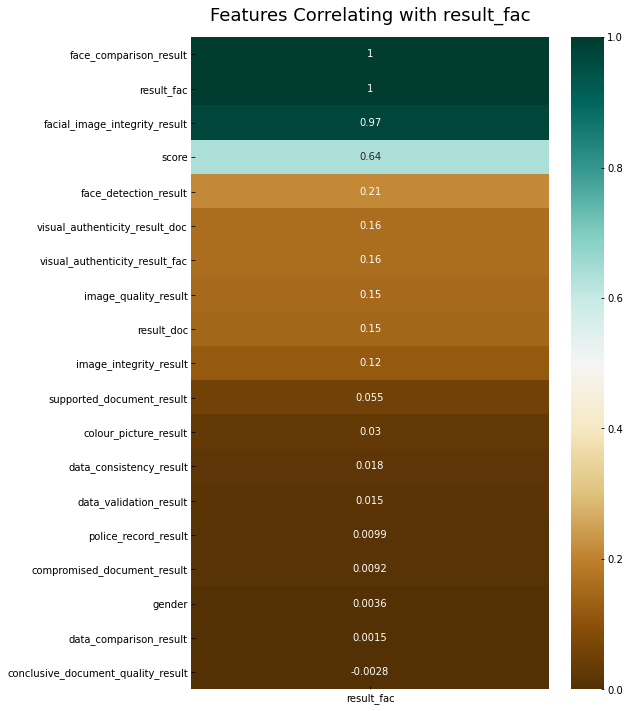

In [117]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_final.corr()[['result_fac']].sort_values(by='result_fac', ascending=False), vmin=0, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with result_fac', fontdict={'fontsize':18}, pad=16);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe684eef98>,
      dtype=object)

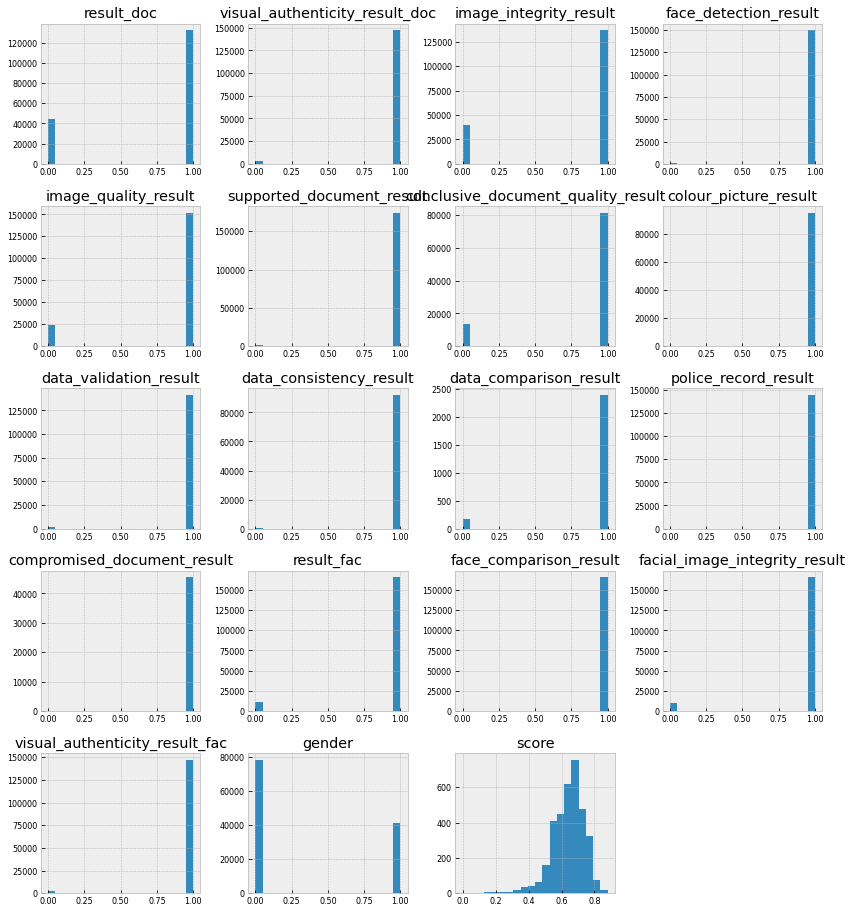

In [118]:
#@title Histograms
df_num = df_final.select_dtypes(include=['float64', 'int64'])
df_num.hist(figsize=(14,16), bins=20, xlabelsize=8, ylabelsize=8)